# **NETFLIX CASESTUDY**

# **PROBLEM STATEMENT**

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries



**About NETFLIX**

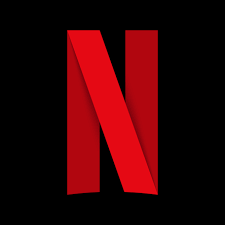

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Dataset link: [*netflix_dataset*
](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv)

**Loading netflix dataset**


In [ ]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"

--2025-01-31 10:37:02--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.169.117.172, 3.169.117.127, 3.169.117.64, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.169.117.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv.5’

netflix.csv.5       100%[===================>]   3.24M  --.-KB/s    in 0.1s    

2025-01-31 10:37:02 (28.0 MB/s) - ‘netflix.csv.5’ saved [3399671/3399671]



In [ ]:
# Import relevant Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
df = pd.read_csv('netflix.csv')

# **Analysing Dataset**

In [ ]:
# Look at the sample data(5 rows)
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6091,s6092,Movie,Adore,Anne Fontaine,"Naomi Watts, Robin Wright, Xavier Samuel, Jame...","Australia, France","November 20, 2019",2013,R,111 min,"Dramas, Independent Movies, International Movies",When lifelong friends Roz and Lil fall in love...
3964,s3965,TV Show,Osmosis,NaN,"Agathe Bonitzer, Hugo Becker, Gaël Kamilindi, ...",France,"March 29, 2019",2019,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries","In near-future Paris, two brilliant siblings u..."
1026,s1027,Movie,Barbie & Chelsea: The Lost Birthday,Cassi Simonds,"America Young, Cassidy Naber, Kirsten Day, Cas...",United States,"April 16, 2021",2021,TV-Y,60 min,Children & Family Movies,When Barbie’s sister Chelsea thinks her birthd...
4619,s4620,Movie,Hold the Dark,Jeremy Saulnier,"Jeffrey Wright, Alexander Skarsgård, James Bad...",United States,"September 28, 2018",2018,TV-MA,126 min,"Action & Adventure, Dramas","In the grim Alaskan winter, a naturalist hunts..."
1080,s1081,Movie,New Gods: Nezha Reborn,Zhao Ji,"Yang Tianxiang, Zhang He, Xuan Xiaoming, Li Sh...",China,"April 12, 2021",2021,TV-14,118 min,"Action & Adventure, Anime Features, Internatio...",While living as an ordinary deliveryman and mo...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

The columns in the dataset specifies the following information:

**Show_id**: Unique ID for every Movie / Tv Show

**Type**: Identifier - A Movie or TV Show

**Title**: Title of the Movie / Tv Show

**Director**: Director of the Movie

**Cast**: Actors involved in the movie/show

**Country**: Country where the movie/show was produced

**Date_added**: Date it was added on Netflix

**Release_year**: Actual Release year of the movie/show

**Rating**: TV Rating of the movie/show

**Duration**: Total Duration - in minutes or number of seasons

**Listed_in**: Genre

**Description**: The summary description






In [ ]:
# No. of rows and columns
df.shape

(8807, 12)

In [ ]:
# Basic Info: Column names, column data type, number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


df.info() provides a concise summary of a DataFrame, including the number of entries, column names, data types, non-null counts, and memory usage.

In [ ]:
# Converting type, rating,country columns into categorical type

df['type']=df['type'].astype('category')
df['rating']=df['rating'].astype('category')
df['country']=df['country'].astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   object  
 5   country       7976 non-null   category
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   category
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(3), int64(1), object(8)
memory usage: 676.6+ KB
None


In [ ]:
#identifying missing values in the dataset

df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
#filling missing values in director,cast using unknown_columnname
for column in ['director', 'cast']:
    df[column] = df[column].fillna(f"unknown_{column}")

#filling missing values in country,rating(categorical) using unknown_columnname

for column in ['country', 'rating']:
    df[column] = df[column].cat.add_categories(f"unknown_{column}").fillna(f"unknown_{column}")

#filling missing values in duration using mode for each category

# Calculate mode duration for movies and TV shows
mode_movie_duration = df[df['type'] == 'Movie']['duration'].mode()[0]
mode_tvshow_duration = df[df['type'] == 'TV Show']['duration'].mode()[0]

# Fill missing values based on type
df.loc[(df['type'] == 'Movie') & (df['duration'].isnull()), 'duration'] = mode_movie_duration
df.loc[(df['type'] == 'TV Show') & (df['duration'].isnull()), 'duration'] = mode_tvshow_duration

#filling missing values in date_added using mode
mode_date_added = df['date_added'].mode()[0]
df['date_added'].fillna(mode_date_added, inplace=True)


<ipython-input-301-11515deb3623>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_added'].fillna(mode_date_added, inplace=True)


In [ ]:
#after filling missing values in every column
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df.describe()#provide statistical summary of numerical columns by default

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include='category')#provide statistical summary of categorical columns

,type,country,rating
count,8807,8807,8807
unique,2,749,18
top,Movie,United States,TV-MA
freq,6131,2818,3207


**Insights:**

1.   Given dataset contains two unique values for type, in which movies are of dominant type
2.   United States is the most frequent country, reflecting significant dominance in content production
1.   A high proportion of the content is rated TV-MA







In [ ]:
df.describe(include='object')#provide statistical summary of object type columns

,show_id,title,director,cast,date_added,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807
unique,8807,8807,4529,7693,1767,220,514,8775
top,s1,Dick Johnson Is Dead,unknown_director,unknown_cast,"January 1, 2020",1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,1,2634,825,119,1793,362,4


# **Non-Graphical Analysis**

In [ ]:
#The value_counts method provides the frequency of unique values in a column.
print(df['type'].value_counts())
print()
# unique()provides distinct values in a column
print(df['type'].unique())
print()
#nunique() gives you the total number of unique values in a column.
print(df['type'].nunique())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']

2


**Insight:**
There are two types of content 1. Movie 2. TV Show

Movies making up around 70% of the content.


In [ ]:
df['title'].value_counts()

,count
title,
Dick Johnson Is Dead,1
Ip Man 2,1
Hannibal Buress: Comedy Camisado,1
Turbo FAST,1
Masha's Tales,1
...,...
Love for Sale 2,1
ROAD TO ROMA,1
Good Time,1


**Insight**

Each title in the dataset is unique, with only one entry per title.

In [ ]:
df_d=df.copy(deep=False)#creating shallow copy of original df
#splitting and exploding director column to check for insights
df_d['director']=df_d['director'].str.split(', ')
df_d=df_d.explode('director')
df_d['director'].value_counts()

,count
director,
unknown_director,2634
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
...,...
Raymie Muzquiz,1
Stu Livingston,1
Joe Menendez,1


Rajiv Chilaka has directed a large volume of popular or frequently viewed content


In [ ]:
new_df=df.copy(deep=False)#creating shallow copy of original df
#splitting and exploding cast column to check for insights
new_df['cast']=new_df['cast'].str.split(', ')
new_df=new_df.explode('cast')
new_df['cast'].value_counts()

,count
cast,
unknown_cast,825
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
...,...
Melanie Straub,1
Gabriela Maria Schmeide,1
Helena Zengel,1


Actors Anupam Kher, Shah Rukh Khan and Julie Tejwani frequently appear in Netflix content



In [ ]:
dummy_df=df.copy(deep=False)#creating shallow copy of original df
#splitting and exploding country column to check for insights
dummy_df['country']=dummy_df['country'].str.split(', ')
dummy_df=dummy_df.explode('country')
dummy_df['country'].value_counts()

,count
country,
United States,3689
India,1046
unknown_country,831
United Kingdom,804
Canada,445
...,...
Bermuda,1
Ecuador,1
Armenia,1


Major producers of content(TV shows/Movies) is United States and India

In [ ]:
df['date_added'].value_counts()

,count
date_added,
"January 1, 2020",119
"November 1, 2019",89
"March 1, 2018",75
"December 31, 2019",74
"October 1, 2018",71
...,...
"December 4, 2016",1
"November 21, 2016",1
"November 19, 2016",1


 The high counts for dates like "January 1, 2020", "November 1, 2019", and "March 1, 2018" suggest a preference for adding content on the first of the month.

 January, November, and March seem to be particularly favored for content additions.

 The data also hints at a trend of increased content additions around the end and beginning of the year


In [ ]:
df['release_year'].value_counts()

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1959,1
1925,1
1961,1


Netflix primarily features recently released movies and shows (2016-2020) while also offering a selection of classic and older films for a diverse catalog.

In [ ]:
df=pd.read_csv('netflix.csv')
irrelevant_ratings = ['66 min', '74 min', '84 min']
# Get the indices of rows with irrelevant ratings
indices_to_drop = df[df['rating'].isin(irrelevant_ratings)].index

# Drop the rows
df.drop(indices_to_drop,inplace=True)
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


The dataset primarily features mature audience content, with TV-MA being the most frequent rating.

In [ ]:
#calculating duration based on movies and tvshows
movies_df=df[df['type']=='Movie']
tv_shows_df=df[df['type']=='TV Show']
print('Movies duration')
print(movies_df['duration'].value_counts())#movie duration counts
print()
print('TV shows duration')
print(tv_shows_df['duration'].value_counts())#tvshow duration counts


Movies duration
duration
90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: count, Length: 205, dtype: int64

TV shows duration
duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: count, dtype: int64


Netflix should focus on shorter seasons (1-3 seasons)

While 90-94 minute movies are common, Netflix should maintain a diverse range, including lengths between 16 and 190+ minutes to cater to broader preferences.

In [ ]:
#this is to identify types of genre associated with data
df1=df.copy(deep=False)
df1['listed_in']=df1['listed_in'].str.split(', ')
df1=df1.explode('listed_in')
df1['listed_in'].value_counts()

,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


Netflix content primarily consists of International Movies, Dramas, Comedies,International TV Shows, Documentaries,Action & Adventure from above data

In [ ]:
df['description'].value_counts()

,count
description,
"Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.",4
"Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.",3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.,3
"Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.",3
"An affable, newly appointed college warden proves to be no ordinary man when an old enemy resurfaces and exposes his complicated, violent past.",2
...,...
"When his partner in crime goes missing, a small-time crook’s life is transformed as he dedicates himself to raising the daughter his friend left behind.",1
"During 1962’s Cuban missile crisis, a troubled math genius finds himself drafted to play in a U.S.-Soviet chess match – and a deadly game of espionage.",1
A teen's discovery of a vintage Polaroid camera develops into a darker tale when she finds that whoever takes their photo with it dies soon afterward.,1


The majority of descriptions appear only once (count of 1), indicating that most movies and TV shows have distinct and unique summaries. This suggests a diverse range of content with varied storylines.

# **Graphical Analysis**

In [ ]:
#Univariate
#continuous variable(s): Boxplot, histogram
#categorical variable(s): countplot(Barchart),piechart,Horizontal Bar Chart
#Bivariate analysis
#scatter plot
#correlation: Heatmaps, Pairplots

In [ ]:
#Pre-processing of the data(Unnesting) in columns like Actor, Director, Country to perform visual analsis

# Unnesting 'cast'
df_cast_unnested = df.assign(cast=df['cast'].str.split(', ')).explode('cast')

# Unnesting 'director'
df_director_unnested = df.assign(director=df['director'].str.split(', ')).explode('director')

# Unnesting 'country'
df_country_unnested = df.assign(country=df['country'].str.split(', ')).explode('country')

#Univariate Analysis

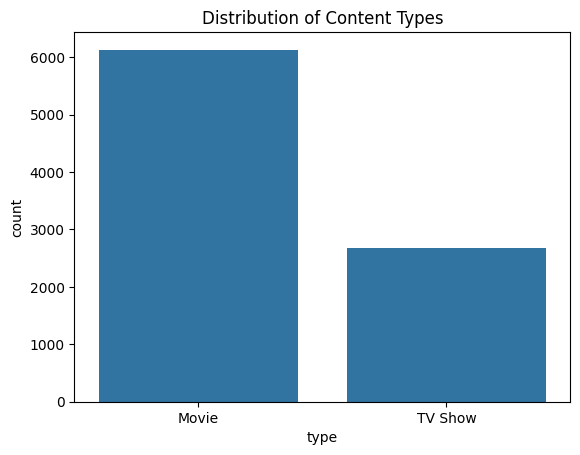

In [ ]:
#Content Type Distribution-countplot
sns.countplot(x='type', data=df)
plt.title('Distribution of Content Types')
plt.show()

Insights:
The countplot of content types reveals that movies are the dominant content type, suggesting a focus on offering a wide variety of movies to subscribers.



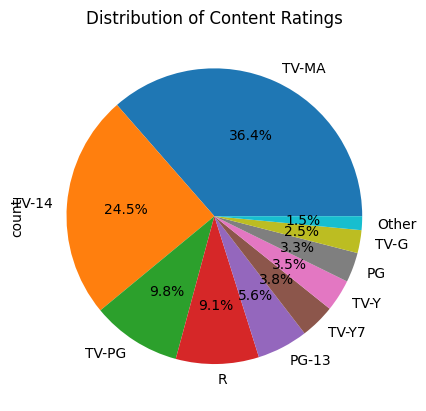

In [ ]:
#Content Rating Distribution
rating_counts=df['rating'].value_counts()
threshold = 0.02  #have many small slices,grouping them into a single "Other" category by setting threshold value 2%
other_count = rating_counts[rating_counts < threshold * rating_counts.sum()].sum()
rating_counts = rating_counts[rating_counts >= threshold * rating_counts.sum()]
rating_counts['Other'] = other_count

rating_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Content Ratings')
plt.show()

Insights:
A significant portion of Netflix's content is targeted toward mature audiences (TV-MA).

There's a substantial amount of content suitable for teenagers and older viewers (TV-14).

The presence of 9.8% TV-PG content and 9.1% R-rated content suggests a balance between family-friendly and mature content

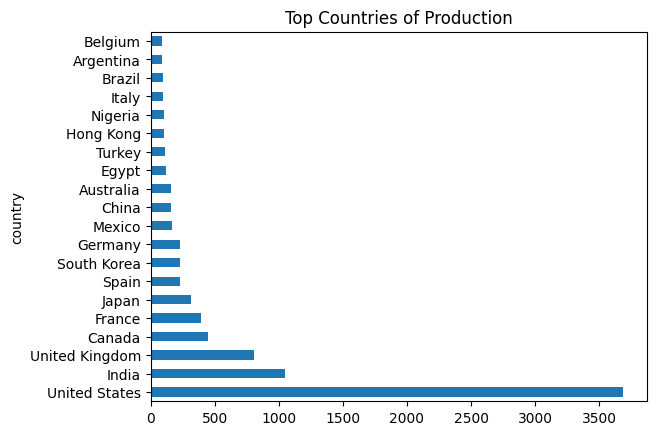

In [ ]:
#Top Countries of Production
top_countries = df_country_unnested['country'].value_counts().head(20)# Top 20
top_countries.plot(kind='barh')#horizontal barchart
plt.title('Top Countries of Production')
plt.show()

Insights:Bar chart of the top 20 countries in the Netflix dataset shows that the US contribute the most content. This highlights their key role in shaping Netflix’s global content strategy and providing a wide variety of shows and movies from different regions.


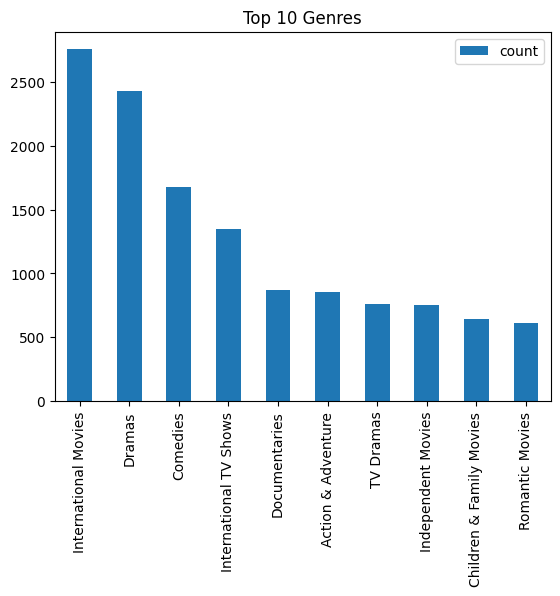

In [ ]:
#Genre Distribution:
from collections import Counter
genre_counts = Counter(genre for genres in df['listed_in'].str.split(', ') for genre in genres)
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count'])
genre_df.sort_values('count', ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Genres')
plt.xticks(rotation=90)
plt.show()


Insights:
Bar chart plotted for top 10 genre suggests that Intenational Movies and Dramas are most popular genres


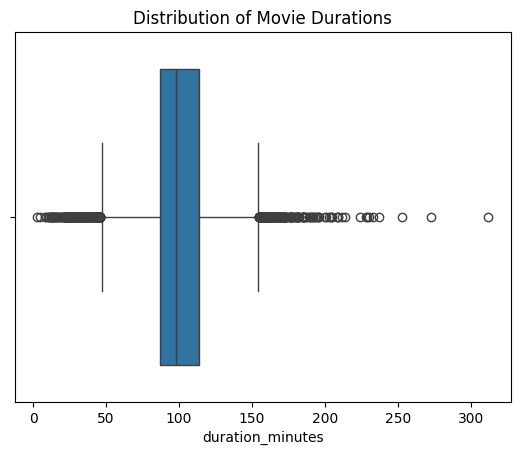

<Figure size 1200x1400 with 0 Axes>

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_minutes, dtype: float64


In [ ]:
#Duration in minutes for Movies in box plot
df_movie = df[df['type'] == 'Movie'].copy()
df_movie['duration_minutes']= df_movie['duration'].apply(lambda x : x[ : -4]).astype(int)
sns.boxplot(x='duration_minutes', data=df_movie)
plt.title('Distribution of Movie Durations')
plt.figure(figsize=(12,14))
plt.show()
print(df_movie['duration_minutes'].describe())

Insights:

**min** =  3.000000,
**Q1(25%)** =  87.000000,
**Q2(50%)** =  98.000000,
**Q3(75%)** =  114.000000,
**max** =312.000000

*   Typical movie length is around 98 minutes.

*   Most movies have durations between 87 and 114 minutes.
*   There are some very short and very long movies, which could be considered outliers.

*  The distribution is slightly skewed towards longer durations(more movies with longer durations than shorter durations relative to the typical length).



In [ ]:
#Outliers in above boxplot
q1 = df_movie['duration_minutes'].quantile(0.25)#first quartile (25th percentile)
q3 = df_movie['duration_minutes'].quantile(0.75) #third quartile (75th percentile)


iqr = q3-q1# interquartile range (IQR).

ub = q3 + 1.5*iqr# upper bound
lb = q1 - 1.5*iqr#lower bound

print('upper_bound=',ub)
print('lower_bound=',lb)
# data points that fall below the lower bound or above the upper bound are identified as outliers
outliers=df_movie[(df_movie['duration_minutes'] < lb) | (df_movie['duration_minutes'] > ub)]

print(outliers['duration_minutes'].sample(5))
# Count outliers
num_outliers = len(outliers)
print("Number of outliers:", num_outliers)

upper_bound= 154.5
lower_bound= 46.5
3456     24
5481    164
2484    233
1132    185
1255    177
Name: duration_minutes, dtype: int64
Number of outliers: 450


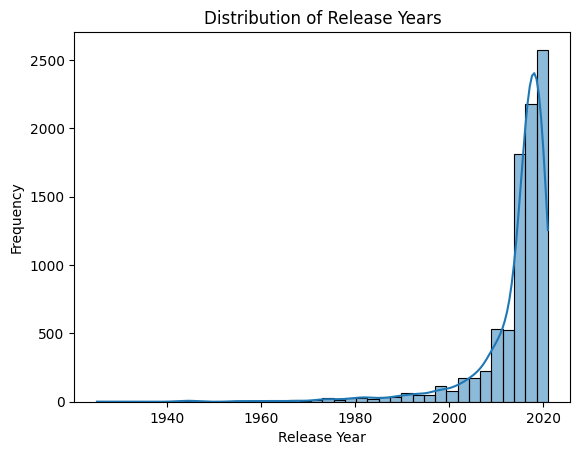

In [ ]:
#Release Year Trend-histogram and KDE in single plot
sns.histplot(x='release_year', data=df, bins=40,kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

Insights:

The above histogram and KDE plot shows a higher frequency of titles in recent years, especially from the 2010s onward.

A peak around 2018-2020: This suggests that the majority of movies in the dataset were released during this period.

A few outliers in the early 1900s: This could represent classic films or older content that Netflix has added to its library.

country
United States     2748
India              962
United Kingdom     532
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: count, dtype: int64


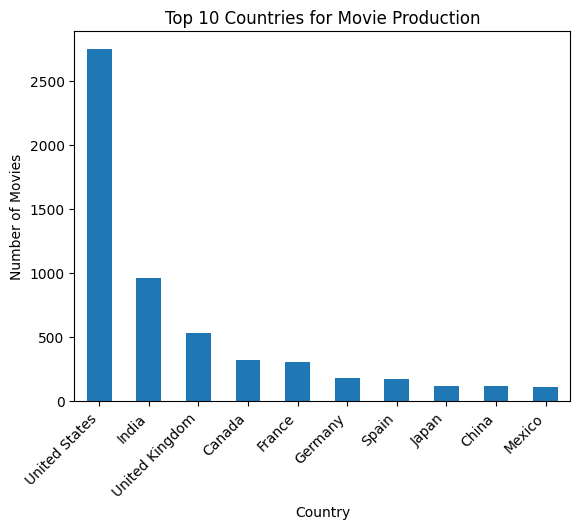

In [ ]:
#Comparison of tv shows vs. movies.
#a. Find the number of movies produced in each country and pick the top 10 countries.
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['country']= movies_df['country'].str.split(', ')
movies_df = movies_df.explode('country')
country_counts = movies_df['country'].value_counts()
top_10_countries = country_counts.head(10)
print(top_10_countries)
#Creating a bar chart
top_10_countries.plot(kind='bar')
plt.title('Top 10 Countries for Movie Production')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

country
United States     938
United Kingdom    272
Japan             199
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Spain              61
Name: count, dtype: int64


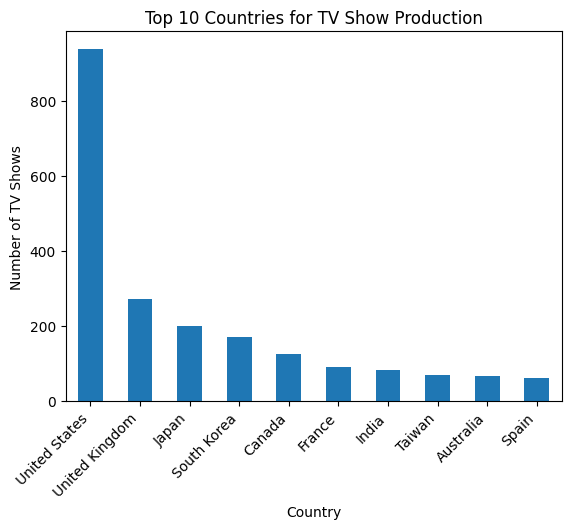

In [ ]:
#b. Find the number of Tv-Shows produced in each country and pick the top 10
#countries.
tv_shows_df = df[df['type'] == 'TV Show'].copy()
tv_shows_df['country']= tv_shows_df['country'].str.split(', ')
tv_shows_df = tv_shows_df.explode('country')
country_counts = tv_shows_df['country'].value_counts()
top_10_countries = country_counts.head(10)
print(top_10_countries)
#Creating a bar chart
top_10_countries.plot(kind='bar')
plt.title('Top 10 Countries for TV Show Production')
plt.xlabel('Country')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45, ha='right')
plt.show()

            country  movie_count  tv_show_count
119   United States       2748.0          938.0
47            India        962.0           84.0
117  United Kingdom        532.0          272.0
22           Canada        319.0          126.0
38           France        303.0           90.0
40          Germany        182.0           44.0
105           Spain        171.0           61.0
55            Japan        119.0          199.0
25            China        114.0           48.0
69           Mexico        111.0           58.0


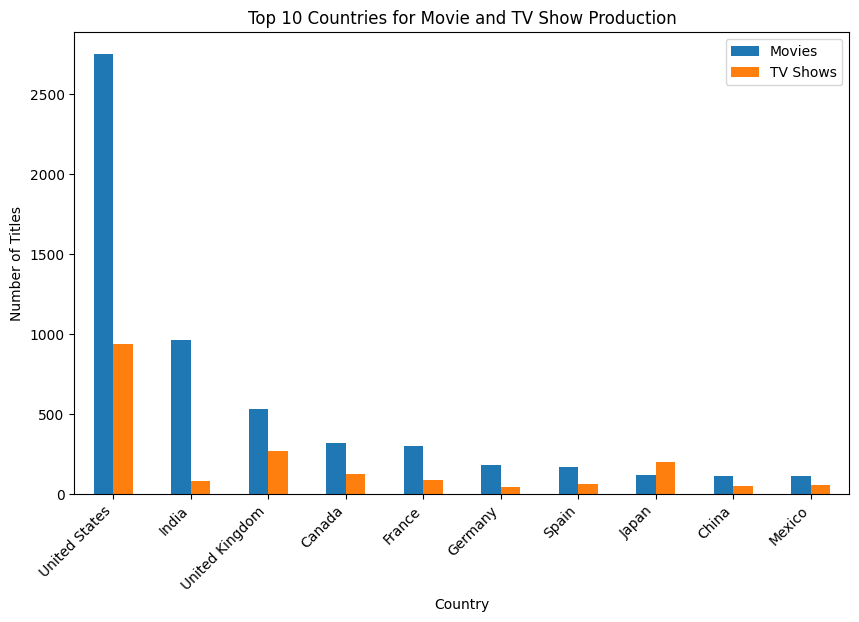

In [ ]:
#Top 10 countries for movies and TV shows production
df1 = df.assign(country=df['country'].str.split(', ')).explode('country')#unnesting country column
tv_shows_df = df1[df1['type'] == 'TV Show']
movies_df = df1[df1['type'] == 'Movie']
# For movies:
movie_country_counts = movies_df.groupby('country')['title'].nunique().reset_index(name='movie_count')

# For TV shows:
tv_show_country_counts = tv_shows_df.groupby('country')['title'].nunique().reset_index(name='tv_show_count')
country_counts = pd.merge(movie_country_counts, tv_show_country_counts, on='country', how='outer').fillna(0)
top_10_countries = country_counts.sort_values(by=['movie_count', 'tv_show_count'], ascending=False).head(10)
print(top_10_countries)
top_10_countries.plot(x='country', y=['movie_count', 'tv_show_count'], kind='bar', figsize=(10, 6))
plt.title('Top 10 Countries for Movie and TV Show Production')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(['Movies', 'TV Shows'])
plt.show()

Final Insights:
#Comparison of tv shows vs. movies.

1. U.S. Dominates Content Production:	The U.S. produces nearly 3 times more TV shows than any other country, highlighting its strong entertainment industry.

2. India’s Movie Industry is Strong, but TV Shows Lag: Despite ranking second in movies (962), India has significantly fewer TV shows (84), indicating a focus on cinema over series.

3. UK and Canada Have a More Balanced Content Output: The UK (272 TV shows) and Canada (126 TV shows) show a more balanced mix of movies and TV content compared to other nations.

4. France and Germany Have Modest but Significant Contributions: Both France (303 movies) and Germany (182 movies) prioritize film over TV shows, reflecting their cinema-focused industries.

5. Japan’s TV Show Industry is Bigger Than Its Movie Industry: Japan has more TV shows (199) than movies (119).

6. China’s Presence is Surprisingly Low: China’s lower numbers (114 movies, 48 TV shows) are likely due to strict content regulations and domestic platform dominance.

7. Mexico and Spain Have Comparable Production Levels: Mexico (111 movies, 58 TV shows) and Spain (171 movies, 61 TV shows) play a key role in global Spanish-language content.



Best week for TV shows: 27
Best week for movies: 1


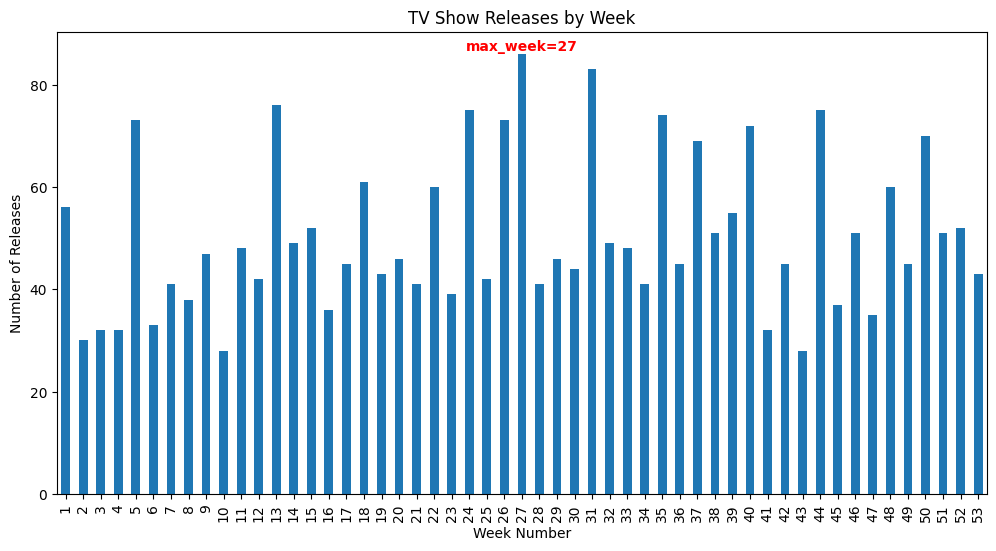

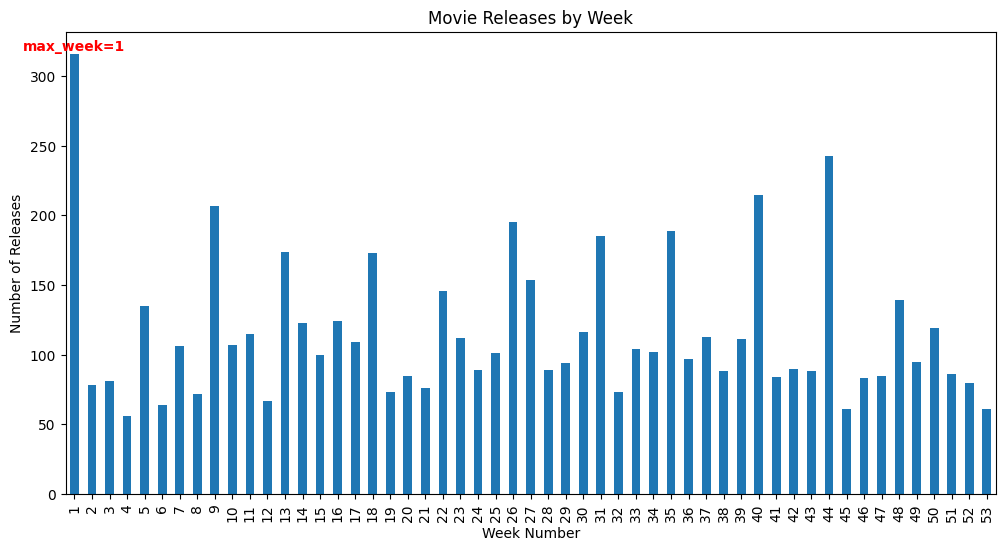

In [ ]:
#What is the best time to launch a TV show/Movie?
#Which is the best week to release the Tv-show or the movie?
df_original = df.copy()
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed')
df['week_number'] = df['date_added'].dt.isocalendar().week
#print(df[['date_added','week_number']])
tv_shows_df = df[df['type'] == 'TV Show']
movies_df = df[df['type'] == 'Movie']
tv_show_weekly_counts = tv_shows_df.groupby('week_number')['show_id'].count()  # Count unique show IDs
movie_weekly_counts = movies_df.groupby('week_number')['show_id'].count()  # Count unique movie IDs
best_week_tv_shows = tv_show_weekly_counts.idxmax()
best_week_movies = movie_weekly_counts.idxmax()
print("Best week for TV shows:", best_week_tv_shows)
print("Best week for movies:", best_week_movies)
# Bar chart for TV shows
plt.figure(figsize=(12, 6))
bars=tv_show_weekly_counts.plot(kind='bar')
plt.title('TV Show Releases by Week')
plt.xlabel('Week Number')
plt.ylabel('Number of Releases')
max_value = tv_show_weekly_counts.max()
max_index = tv_show_weekly_counts.idxmax()
plt.text(
    x=tv_show_weekly_counts.index.get_loc(max_index),
    y=max_value,
    s='max_week='+f'{max_index}',
    ha='center',
    va='bottom',
    color='red',
    fontweight='bold'
)
plt.show()

# Bar chart for movies
plt.figure(figsize=(12, 6))
movie_weekly_counts.plot(kind='bar')
plt.title('Movie Releases by Week')
plt.xlabel('Week Number')
plt.ylabel('Number of Releases')
max_value = movie_weekly_counts.max()
max_index = movie_weekly_counts.idxmax()
plt.text(
    x=movie_weekly_counts.index.get_loc(max_index),
    y=max_value,
    s='max_week='+f'{max_index}',
    ha='center',
    va='bottom',
    color='red',
    fontweight='bold'
)
plt.show()


Insights:
The optimal launch week for a TV show appears to be week 27 (typically late June or early July), while the best week for a movie release seems to be week 1 (the first week of the year).

Best month for TV shows: December
Best month for movies: July


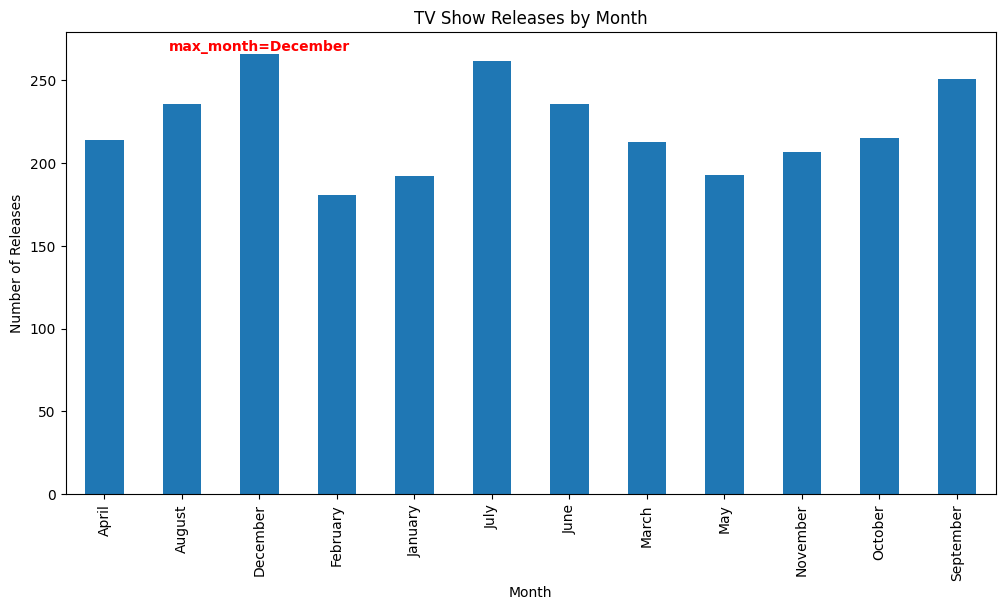

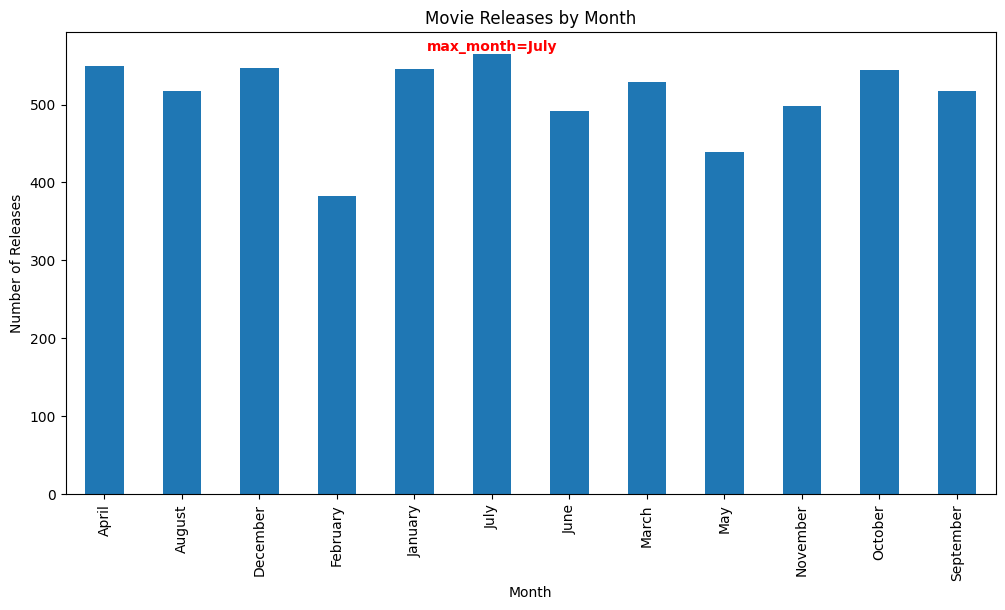

In [ ]:
#which is the best month to release the Tv-show or the movie?
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month_name()
tv_shows_df = df[df['type'] == 'TV Show']
movies_df = df[df['type'] == 'Movie']
tv_show_monthly_counts = tv_shows_df.groupby('month_added')['show_id'].count()  # Count unique show IDs
movie_monthly_counts = movies_df.groupby('month_added')['show_id'].count()  # Count unique movie IDs
print("Best month for TV shows:", tv_show_monthly_counts.idxmax())
print("Best month for movies:", movie_monthly_counts.idxmax())
# Bar chart for TV shows
plt.figure(figsize=(12, 6))
tv_show_monthly_counts.plot(kind='bar')
plt.title('TV Show Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
max_value = tv_show_monthly_counts.max()
max_index = tv_show_monthly_counts.idxmax()
plt.text(
    x=tv_show_monthly_counts.index.get_loc(max_index),
    y=max_value,
    s='max_month='+f'{max_index}',
    ha='center',
    va='bottom',
    color='red',
    fontweight='bold'
)
plt.show()

# Bar chart for movies
plt.figure(figsize=(12, 6))
movie_monthly_counts.plot(kind='bar')
plt.title('Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
max_value = movie_monthly_counts.max()
max_index = movie_monthly_counts.idxmax()
plt.text(
    x=movie_monthly_counts.index.get_loc(max_index),
    y=max_value,
    s='max_month='+f'{max_index}',
    ha='center',
    va='bottom',
    color='red',
    fontweight='bold'
)
plt.show()

Insights:

The optimal month to launch a new TV show appears to be **December**.

For movies, **July** emerges as the most favorable month

Final Insights:

#What is the best time to launch a TV show/Movie?

1. Weekly Strategy:

TV Shows: Week 27 (typically late June or early July) appears to be the best week to launch a new TV show, aligning with a period of increased TV content additions on Netflix.
Movies: Week 1 (the first week of the year) seems to be the best week for a movie release, potentially coinciding with a focus on fresh content for the new year.
2. Monthly Strategy:

TV Shows: December emerges as the most favorable month to launch a new TV show, possibly leveraging the holiday season and increased viewership trends.
Movies: July appears to be the best month for movie releases, potentially aligning with summer blockbuster releases and school holidays.


In [ ]:
df=df_original.copy()#retaining original df

In [ ]:
#Analysis of actors/directors of different types of shows/movies.
#Identify the top 10 actors who have appeared in most movies or TV shows.
df_cast_unnested = df.assign(cast=df['cast'].str.split(', ')).explode('cast')  #unnesting cast column
actor_counts = df_cast_unnested.groupby('cast')['title'].nunique().reset_index(name='title_count')#Grouping by Actor and Counting Unique Titles
top_10_actors = actor_counts.sort_values(by='title_count', ascending=False).head(10)#top 10 actors
print(top_10_actors)

                   cast  title_count
2833        Anupam Kher           43
30489    Shah Rukh Khan           35
16697     Julie Tejwani           33
24215  Naseeruddin Shah           32
32591  Takahiro Sakurai           32
28974      Rupa Bhimani           31
846        Akshay Kumar           30
25424           Om Puri           30
35880         Yuki Kaji           29
1774   Amitabh Bachchan           28


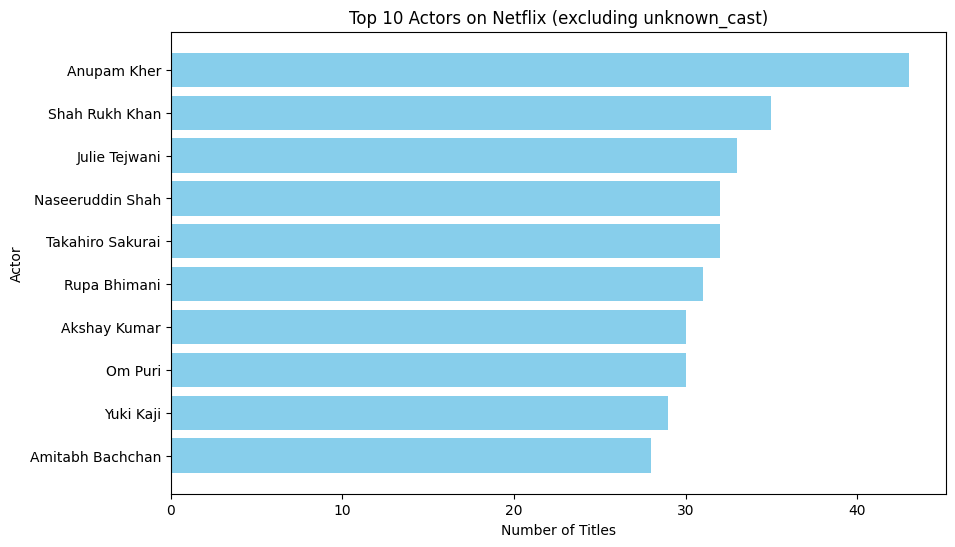

In [ ]:
#Plot Top 10 Actors who have appeared in most movies or TV shows
top_10_actors_known = top_10_actors[top_10_actors['cast'] != 'unknown_cast']#excluding unknown_cast

plt.figure(figsize=(10, 6))
plt.barh(top_10_actors_known['cast'], top_10_actors_known['title_count'], color='skyblue')
plt.title('Top 10 Actors on Netflix (excluding unknown_cast)')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.gca().invert_yaxis()
plt.show()

**Insights from Top 10 Actors:**
#Identify the top 10 actors who have appeared in most movies or TV shows.

*   A significant portion of Netflix content has an 'unknown_cast', suggesting potential data gaps or productions with limited cast information.
*  Indian actors, including Anupam Kher, Shah Rukh Khan, and Julie Tejwani, feature prominently, highlighting the significance of Indian content on Netflix.
*   Renowned Bollywood actors like Shah Rukh Khan and Naseeruddin Shah showcase the global reach and popularity of Bollywood content.
*   The presence of voice actors like Takahiro Sakurai, Rupa Bhimani, and Yuki Kaji highlights the growing popularity of anime and animated content.
*   The top 10 actors represent diverse backgrounds, industries, and genres, reflecting Netflix's commitment to global content.







In [ ]:
#Identify the top 10 directors who have appeared in most movies or TV shows.
df_director_unnested = df.assign(director=df['director'].str.split(', ')).explode('director')  #unnesting director column
director_counts = df_director_unnested.groupby('director')['title'].nunique().reset_index(name='title_count')#Grouping by Director and Counting Unique Titles
top_10_directors = director_counts.sort_values(by='title_count', ascending=False).head(10)#top 10 directors
print(top_10_directors)

                 director  title_count
3748        Rajiv Chilaka           22
1906            Jan Suter           21
3799          Raúl Campos           19
2865         Marcus Raboy           16
4456          Suhas Kadav           16
1954            Jay Karas           15
755   Cathy Garcia-Molina           13
2944      Martin Scorsese           12
4940      Youssef Chahine           12
1951          Jay Chapman           12


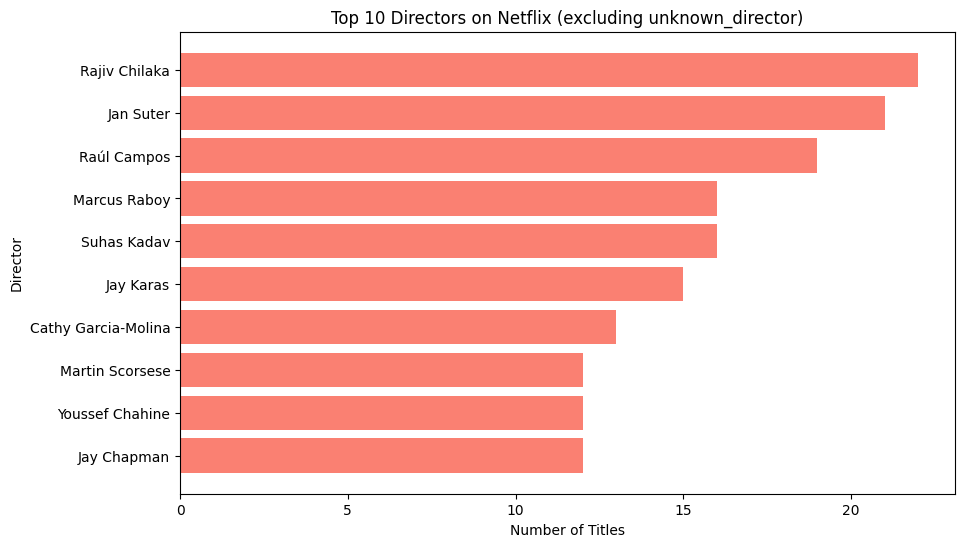

In [ ]:
#plotting 'top_10_directors' who have appeared in most movies or TV shows

top_10_directors_known = top_10_directors[top_10_directors['director'] != 'unknown_director']#excluding unknown_director

plt.figure(figsize=(10, 6))
plt.barh(top_10_directors_known['director'], top_10_directors_known['title_count'], color='salmon')
plt.title('Top 10 Directors on Netflix (excluding unknown_director)')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.gca().invert_yaxis()
plt.show()

Insights from Top 10 Directors:
#Identify the top 10 directors who have appeared in most movies or TV shows

*   Unknown Directors are Common: A large number of titles have 'unknown_director', indicating a potential lack of readily available director information for certain productions.

*   Rajiv Chilaka Leads Known Directors

*   Diverse Directorial Styles: The top directors represent various genres and filmmaking styles, showcasing the diversity of content on Netflix.

*  International Representation: Directors from different countries, including India, the US, and Egypt, are among the top 10, reflecting Netflix's global reach.





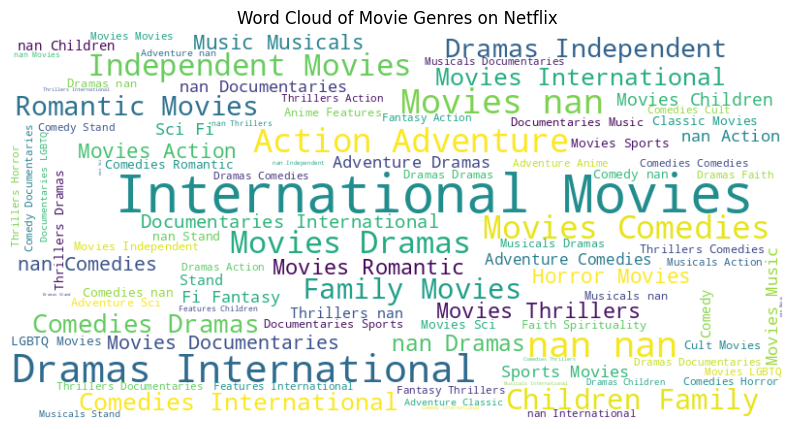

In [ ]:
#Which genre movies are more popular or produced more
#using word cloud
from wordcloud import WordCloud
movies_df=df[df['type']=='Movie']
df_genre_unnested = df.assign(listed_in=movies_df['listed_in'].str.split(', ')).explode('listed_in')

genre_text = ' '.join(df_genre_unnested['listed_in'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Genres on Netflix')
plt.show()

Insights:
#Which genre movies are more popular or produced more?

Netflix's movie genres are dominated by International Movies, Dramas, Comedies, and Independent Movies, showcasing global diversity and core cinematic preferences.

In [ ]:
#Find After how many days the movie will be added to Netflix after the release ofthe movie (you can consider the recent past data)
#movies_df= movies_df.copy()
movies_df=df[df['type']=='Movie'].copy()
movies_df['date_added'] = pd.to_datetime(movies_df['date_added'],format='mixed')
movies_df['release_year'] = pd.to_datetime(movies_df['release_year'], format='%Y')
movies_df['days_to_add'] = (movies_df['date_added'] - movies_df['release_year']).dt.days
#print(movies_df[['date_added', 'release_year', 'days_to_add']])
mode_days_to_add = movies_df['days_to_add'].mode()[0]#getting the mode to find the most frequent difference
print("Typical days to add a movie to Netflix after release:", mode_days_to_add)

Typical days to add a movie to Netflix after release: 334


#Find After how many days the movie will be added to Netflix after the release ofthe movie?

Netflix typically adds movies to its platform around 334 days (approximately 11 months) after their theatrical release.

#Bivariate Analysis

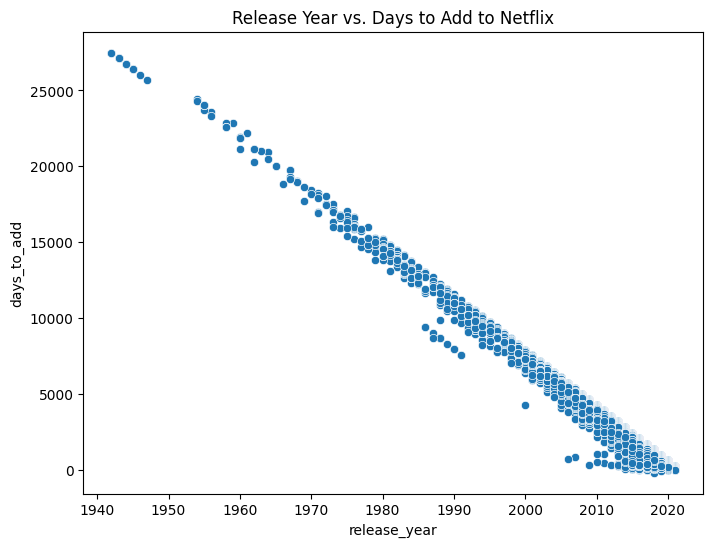

In [ ]:
#Numerical vs Numerical
#How time to add movies to Netflix has changed over the years
#using scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='release_year', y='days_to_add', data=movies_df)
plt.title('Release Year vs. Days to Add to Netflix')
plt.show()

Insights:The strong negative correlation indicates that as the release year of a movie increases (newer movies), the number of days it takes for that movie to be added to Netflix decreases i.e., newer movies tend to be added to Netflix more quickly than older movies.While a few exceptions exist, they don't significantly alter the overall trend.

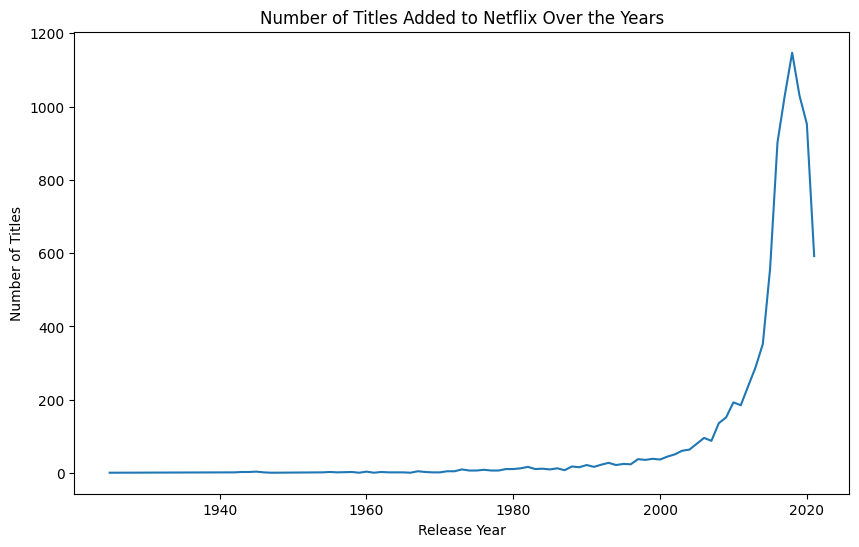

In [ ]:
# Number of movies/TV shows added each year
# Line Plot
plt.figure(figsize=(10, 6))
df.groupby('release_year')['show_id'].count().plot(kind='line')
plt.title('Number of Titles Added to Netflix Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

Insights from above lineplot(showing the number of titles added to Netflix over the years):

Netflix's content library has been growing. They've been adding more movies and shows over time.

The biggest growth happened recently. Around 2010 and after, Netflix really ramped up adding new titles.

There might be a limit to how much they add. The growth might slow down or even slightly decrease at some point. This could be because they're running out of things to add, focusing on quality over quantity, or facing more competition.

In the early days, Netflix added fewer titles. Before they were big into streaming, they didn't add as many movies and shows.



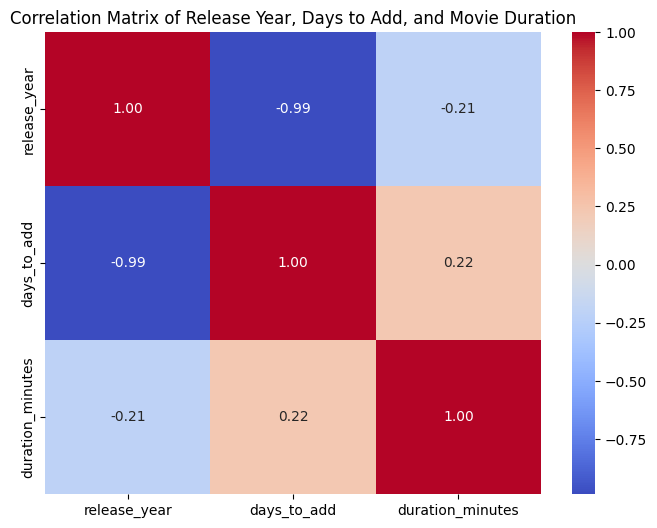

In [ ]:
#Heatmap(to find correlation between multiple numeric variables)
#movies_df=df[df['type'] == 'Movie'].copy()
#Convert duration to numerical (minutes)
movies_df['duration_minutes'] = movies_df['duration'].dropna().apply(lambda x : x[ : -4]).astype('int')
#Calculate correlation matrix
numerical_cols = ['release_year', 'days_to_add', 'duration_minutes']
correlation_matrix = movies_df[numerical_cols].corr()
#print(correlation_matrix)
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Release Year, Days to Add, and Movie Duration')
plt.show()

Insights from HeatMap:

The correlation coefficient between release_year and days_to_add is -0.987408, which is very close to -1. This indicates a very strong negative correlation.

The correlation coefficient between release_year and duration_minutes is -0.206287. This indicates a weak negative correlation.There's a slight tendency for newer movies to have shorter durations compared to older movies. However, this relationship is not very strong.

The correlation coefficient between days_to_add and duration_minutes is 0.224673. This indicates a weak positive correlation.
Interpretation: There's a slight tendency for movies that take longer to be added to Netflix to have longer durations. However, this relationship is also not very strong.

<Figure size 1000x600 with 0 Axes>

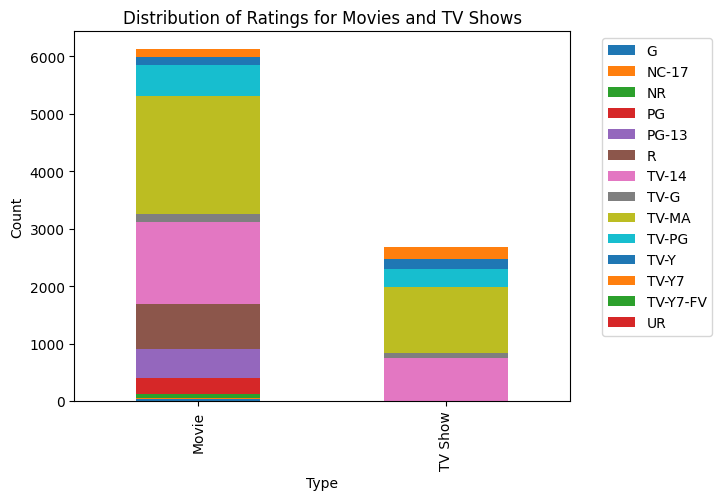

In [ ]:
#Categorical vs. Categorical
#distribution of ratings for movies and TV shows
# Stacked Bar Chart
plt.figure(figsize=(10, 6))
df.groupby(['type', 'rating'])['show_id'].count().unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of Ratings for Movies and TV Shows')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Insights:

The bar for "Movies" likely shows a wider range of rating categories compared to the bar for "TV Shows."

 The largest segment in both bars is likely "TV-MA," indicating that content for mature audiences is the most prevalent for both movies and TV shows on Netflix.

 "TV-14" likely occupies a considerable portion of both bars, suggesting that content suitable for teenagers and older viewers is also a significant part of Netflix's library.

<Figure size 1200x600 with 0 Axes>

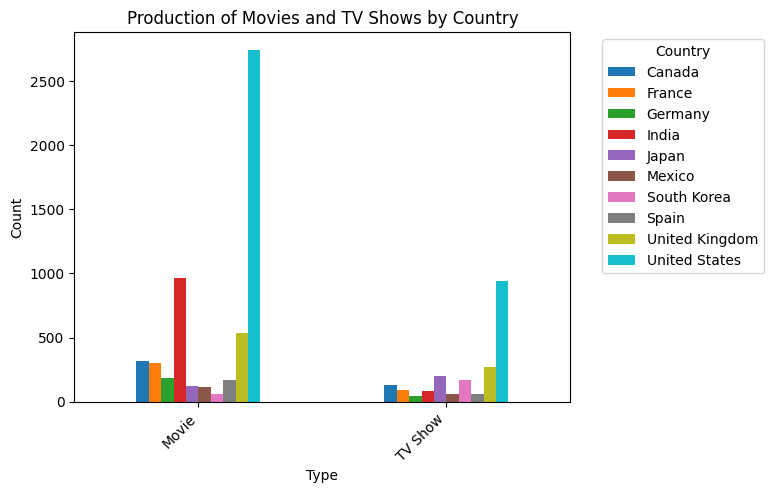

In [ ]:
#production of movies and TV shows by top 10 country
# Grouped Bar Chart
df1 = df.assign(country=df['country'].str.split(', ')).explode('country')#unnesting country column
top_countries = df1['country'].value_counts().head(10).index  # Select top 10 countries
filtered_df1 = df1[df1['country'].isin(top_countries)]  # Filter the DataFrame

plt.figure(figsize=(12, 6))
filtered_df1.groupby(['type', 'country'])['show_id'].count().unstack().plot(kind='bar')
plt.title('Production of Movies and TV Shows by Country')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.show()

Insights:

The United States likely has the highest production volume for both movies and TV shows.

India have a higher production of movies compared to TV shows.

Other countries like the United Kingdom, Canada, Japan, South Korea, Spain, France, and Mexico could also show significant production volumes for either movies or TV shows or both.

 Some countries might have a more balanced output (e.g., the UK, Canada), while others might lean more towards either movies (e.g., India) or TV shows (e.g., Japan, South Korea).

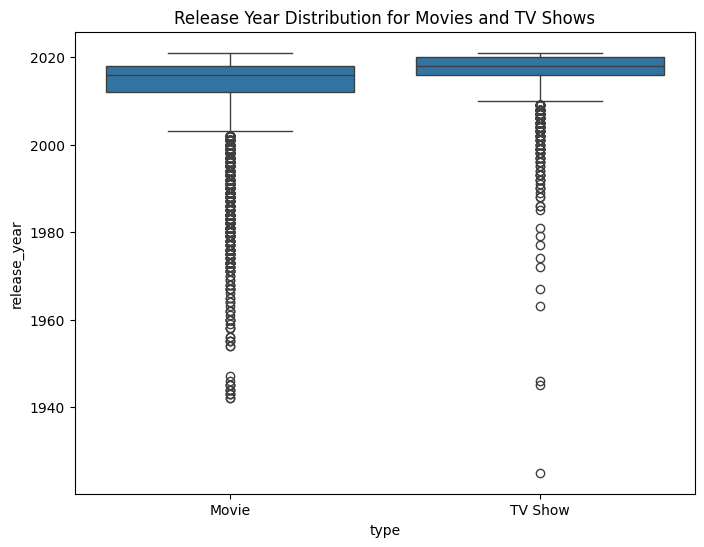

In [ ]:
#Numerical vs. Categorical

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='release_year', data=df)
plt.title('Release Year Distribution for Movies and TV Shows')
plt.show()

Insights:

Median Release Year(close to 2018–2020):

The median line for TV shows is higher than that for movies, it suggests that TV shows on Netflix tend to be more recent releases compared to movies.

Interquartile Range(contains the middle 50% of the data):

Movies have a wider box (IQR) compared to TV shows: This indicates that the release years of movies on Netflix are more spread out or have greater variability compared to TV shows. This suggests that Netflix's movie library includes a wider range of release years, including both newer and older films.

TV shows have slightly more historical content than movies(from outliers)




#**Business Insights:**

From Netflix Dataset

1. **Content Type Dominance: Movies Lead Over TV Shows**
***Pattern Observed:***
*   Movies account for around 70% of Netflix’s content.
*   TV shows have shorter seasons, typically 1–3 seasons.

***Inference:***
*  Netflix is mainly seen as a movie-first platform, but TV shows are also an important part of its offering.
*  Shorter TV show seasons indicate that viewers prefer quick, binge-worthy series rather than long-running ones.
*   Keeping a strong movie library while offering engaging short-season TV shows can help keep users coming back.



2. **Country Dominance in Content Production**
***Pattern Observed:***
* The U.S. leads in both TV shows and movies, creating nearly three times as many TV shows as any other country.
* India is the second-largest movie producer but has fewer TV shows.
* Japan produces more TV shows than movies, reflecting a cultural preference for television.
* China’s content presence is relatively small, likely due to regulatory restrictions.

**Inference:**
*  The U.S. is a key player in Netflix’s global content strategy.
*  Investing in Indian web series can fill the gap in TV content.
*  Japan’s focus on TV shows aligns with the growing global interest in anime, which Netflix should expand further.
*  With China’s restrictions, Netflix should prioritize other Asian markets like South Korea and Japan to strengthen its regional presence.



3. **Audience Targeting: Mature Content is the Most Popular**
***Pattern Observed:***
* TV-MA (Mature Audience) is the most frequent rating, followed by TV-14 rated content.
* The presence of 9.8% TV-PG content and 9.1% R-rated content suggests a balance between family-friendly and mature content

***Inference:***
* Netflix mainly focuses on adult audiences, following trends in mature content.
* Increasing family-friendly content (TV-PG) can attract more young viewers.
* A balanced mix of ratings can help grow Netflix’s audience across all age groups.



4. **Release Trends: Faster Addition of Recent Content**
***Pattern Observed:***
* Movies are typically added to Netflix 334 days (~11 months) after theatrical release.
* Newer movies (after 2016) are being added faster than older ones.
* A strong negative correlation (-0.987) between release year and days-to-add, meaning the more recent the movie, the sooner it appears on Netflix.

***Inference:***
* Netflix has shortened its content acquisition window, which helps retain audience interest in fresh content.
* Reducing this gap even more can give Netflix an edge over competitors.
* A mix of exclusive Originals and quicker movie releases can boost engagement.



5. **Genre Popularity: International and Drama Content Lead**
***Pattern Observed:***
* The top 3 most produced genres are International Movies, Dramas, and Comedies.
* Other high-performing categories include Action & Adventure, Documentaries, and Independent Films.

***Inference:***
* The demand for diverse, internationally produced content is high.
* Netflix should keep investing in global productions with multi-language options.
* Mixing popular genres like drama and comedy (e.g., dramedies, action-dramas) can attract more viewers.



6. **Optimal Timing for Content Releases**
***Pattern Observed:***
* Most TV shows are added in December for holiday binge-watching.
* Movies are mostly added in July, matching summer blockbuster trends.
* Many releases happen on the 1st of the month, showing a planned content schedule.

***Inference:***
* Netflix smartly releases content during peak seasons like summer and winter holidays.
* A planned release schedule keeps viewers engaged and excited.
* Adding exclusive content every few months can help maintain interest year-round.



7. **Viewing Trends: Movie Duration and Audience Preferences**
***Pattern Observed:***
* The typical movie duration is 98 minutes, with most movies ranging between 87 and 114 minutes.
* There are a few very short and very long movies, which appear as outliers.
* The distribution is slightly skewed towards longer durations, showing that audiences are open to extended content.

***Inference:***
* Maintaining average movie length around 98 minutes matches audience expectations.
* Offering a mix of shorter films and longer ones can appeal to different preferences.
* Netflix could introduce segmented storytelling, like multi-part movies or limited-series adaptations.



8. **Historical Trends: Netflix’s Content Growth and Potential Saturation**
***Pattern Observed:***
* Netflix’s content library has steadily grown since 2010, with a peak around 2018-2020.
* Older movies (pre-2000s) exist but make up a small percentage.

***Inference:***
* Netflix has reached a point where adding more content may not be the primary growth driver.
* Focusing on quality over quantity will be key to staying competitive.
* Offering a mix of modern releases and classic films can provide a nostalgic appeal while maintaining fresh content.



9. **Top Actors and Directors: Global Representation Matters**
***Pattern Observed:***
* Shah Rukh Khan, Anupam Kher, and Julie Tejwani are among the most frequently featured actors
* Rajiv Chilaka has directed a significant volume of Netflix content.
* Many titles have ‘unknown_cast’ and ‘unknown_director’, suggesting data gaps or less prominent productions.

***Inference:***
* Bollywood and Indian content have a strong footprint on Netflix, showing its strong influence in India.
* Better metadata and search features can help viewers discover lesser-known titles.



10. **Correlations and Business Implications**
***Pattern Observed:***
* A strong negative correlation (-0.987) between release year and days-to-add, meaning recent movies get added faster.
* A weak negative correlation (-0.206) between release year and duration, indicating newer movies are slightly shorter.
* A weak positive correlation (0.224) between days-to-add and duration, meaning longer movies tend to take slightly longer to be added.

***Inference:***
* Netflix is adding newer movies faster to meet demand for fresh content.
* Slightly shorter movies show that audiences prefer quicker, more engaging experiences.
* Smart decisions on movie length and licensing can improve viewer satisfaction and cost efficiency.


#**Recommendations**

These are simple, actionable recommendations for Netflix based on the analysis:

1. **Focus on Movies with Shorter Seasons for TV Shows**:
Keep making more movies, but also create TV shows with shorter seasons (1-3 seasons) for viewers who like to watch everything quickly.

2. **Invest in Local Content in Key Markets:**
Invest more in Indian TV shows to match the strong movie market in India.
Netflix should also focus on making more local shows in different countries. This helps meet local preferences and gives a chance to share unique local stories with the world.

3. **Expand Family-Friendly Content:**
Make more family-friendly shows and movies to reach a bigger audience, especially in countries with younger viewers. Showcase this content in recommendations to make sure it gets noticed more.

4. **Speed Up Movie Releases:**
Add new movies to Netflix more quickly, especially the latest releases, to keep viewers excited with fresh content.
Reduce the time between when a movie is released in theaters and when it’s available on Netflix.

5. **Balance Content Genres:**
Continue to produce international content, focusing on popular genres like Drama, Comedy, and Action.
Explore creating hybrid genres(like action-comedies), to attract a wider range of viewers and make Netflix’s content more appealing.

6. **Optimize Content Release Timings:**
Launch TV shows in December to take advantage of the holiday binge-watching trend.
Release movies in July to capture the summer peak in viewership.
Plan releases for off-peak periods to keep viewers interested all year long.

7. **Offer a Range of Movie Durations:**
Keep average movie length around 98 minutes, but etry shorter or longer formats to suit different preferences.
Offer a variety of films, from quick and easy watches to longer, more immersive ones.

8. **Focus on Quality Over Quantity:**
As Netflix’s library grows, focus on making high-quality content instead of just adding more.
Offer a mix of new movies and classic ones to attract a wider audience.

9. **Improve Content Discoverability:**
Enhance search and categorization features to help viewers easily find content that matches their interests.
Make it easier to discover lesser-known shows and movies.

10.	**Strengthen Global Partnerships:**
Build closer connections with top actors and directors from different regions to improve Netflix’s content.

11. **Consider Dubbing and Subtitling:**
To overcome language barriers and reach wider audiences, Netflix should invest in high-quality dubbing and subtitles for its content. This will make international shows and movies easier to enjoy for those who prefer watching in their own language.

12. **Adjust Marketing and Promotion:**
Netflix should adjust its marketing to match the preferences and interests of viewers in each country. This will help the platform’s messages feel more relatable and connect better with local audiences.
  

By following these steps, Netflix can better decide which content to produce, improve its audience reach, and grow its business in different countries.